<a href="https://colab.research.google.com/github/seharkansal/SchittVision/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
txt_file_path = './datasets/emotions_dataset.csv'

In [ ]:
# Open the txt file and read the content
with open(txt_file_path, 'r') as file:
    lines = file.readlines()

In [ ]:
# Split the lines into text and emotion based on the delimiter ';'
data = [line.strip().split(',') for line in lines]

In [ ]:
# Create a DataFrame from the data
df = pd.DataFrame(data, columns=['Text', 'Emotion'])
df

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [ ]:
# Define the path to save the CSV
csv_file_path = './datasets/emotions_dataset.csv'

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f"Dataset converted and saved as {csv_file_path}")

Dataset converted and saved as ./datasets/emotions_dataset.csv


In [ ]:
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df.isnull().sum()

Text       0
Emotion    0
dtype: int64

In [ ]:
# Check for duplicates in the 'Text' column
duplicates_text = df[df['Text'].duplicated()]

# Display the duplicated text rows
print(duplicates_text)

                                                    Text   Emotion
5067   i feel on the verge of tears from weariness i ...       joy
6133               i still feel a craving for sweet food      love
6563   i tend to stop breathing when i m feeling stre...     anger
7623   i was intensely conscious of how much cash i h...   sadness
7685   im still not sure why reilly feels the need to...  surprise
8246   i am not amazing or great at photography but i...      love
9596   ive also made it with both sugar measurements ...       joy
9687   i had to choose the sleek and smoother feel of...       joy
9769   i often find myself feeling assaulted by a mul...   sadness
9786        i feel im being generous with that statement       joy
10117  i feel pretty tortured because i work a job an...      fear
10581                       i feel most passionate about       joy
11273  i was so stubborn and that it took you getting...       joy
11354  i write these words i feel sweet baby kicks fr...      

In [ ]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     16000 non-null  object
 1   Emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
print(df.duplicated().sum())

1


In [ ]:
# Remove duplicate rows
df.drop_duplicates(subset=['Text'], inplace=True)

In [ ]:
print(df.duplicated().sum())

0


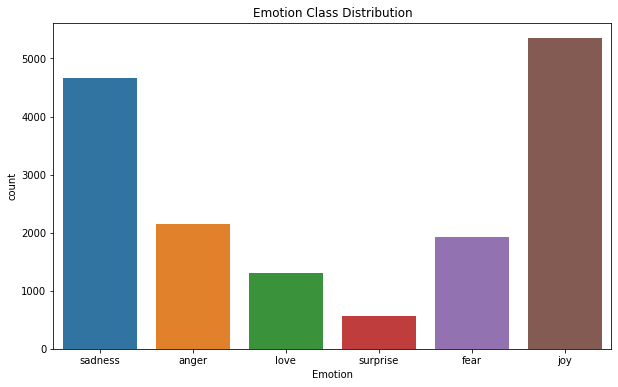

joy         5350
sadness     4664
anger       2155
fear        1933
love        1299
surprise     568
Name: Emotion, dtype: int64


In [ ]:
# Plot class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df)
plt.title('Emotion Class Distribution')
plt.show()

# Check the count of each class
print(df['Emotion'].value_counts())


In [ ]:
'''
Text Preprocessing
The text data needs to be tokenized and preprocessed before it can be used our encoder.

Lowercasing: Convert the text to lowercase for uniformity.
Removing punctuation/numbers: Remove unnecessary characters.
Removing stopwords (optional): Remove common words (e.g., 'the', 'is', 'in').
Tokenization: Split text into words or subwords.
'''

import re
import nltk
from nltk.corpus import stopwords

# Download necessary NLTK packages
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function for text cleaning
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text) #regular expression ([^a-z\s]) removes everything except lowercase letters (a-z) and spaces (\s)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function
df['cleaned_text'] = df['Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /home/sehar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Text,Emotion,cleaned_text
0,i didnt feel humiliated,sadness,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sadness,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,anger,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,anger,feeling grouchy


In [ ]:
#tokenization
from transformers import BertTokenizer
import torch

# Load pre-trained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the texts using the BERT tokenizer
encoded_inputs = tokenizer(list(df.cleaned_text), padding=True, truncation=True, max_length=128,return_tensors="pt")

# Check the tokenized input
print("Tokenized Input IDs:", encoded_inputs["input_ids"])
print("Attention Mask:", encoded_inputs["attention_mask"])

Tokenized Input IDs: tensor([[  101,  2134,  2102,  ...,     0,     0,     0],
        [  101,  2175,  3110,  ...,     0,     0,     0],
        [  101, 10047,  9775,  ...,     0,     0,     0],
        ...,
        [  101,  2514,  2844,  ...,     0,     0,     0],
        [  101,  2514,  2066,  ...,     0,     0,     0],
        [  101,  2113,  2843,  ...,     0,     0,     0]])
Attention Mask: tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [ ]:
# Map emotions to numerical labels
label_map = {"joy": 0, "sadness": 1, "anger": 2, "fear": 3, "love": 4, "surprise": 5}
df['Emotion'] = df['Emotion'].map(label_map)

In [ ]:
labels = torch.tensor(df['Emotion'].values)
print("Labels:\n", labels)

'''
Input IDs: These are the tokenized and numerical representations of the text.
Attention Mask: Indicates which tokens are real (1) and which are padding (0).
Labels: Numerical values corresponding to emotion labels.
'''

Labels:
 tensor([1, 1, 2,  ..., 0, 2, 1])


'\nInput IDs: These are the tokenized and numerical representations of the text.\nAttention Mask: Indicates which tokens are real (1) and which are padding (0).\nLabels: Numerical values corresponding to emotion labels.\n'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15969 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          15969 non-null  object
 1   Emotion       15969 non-null  int64 
 2   cleaned_text  15969 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset from tokenized inputs and emotion labels
emotion_dataset = TensorDataset(
    encoded_inputs["input_ids"],  # Tokenized inputs
    torch.tensor(df["Emotion"].values, dtype=torch.long)  # Emotion labels as tensor
)

# DataLoader for batching
emotion_dataloader = DataLoader(emotion_dataset, batch_size=32, shuffle=True)

In [ ]:
# Check the shapes
print("Input IDs Shape:", encoded_inputs["input_ids"].shape)  # Should return (num_samples, sequence_length)
print("Emotion Labels Shape:", df["Emotion"].values.shape)   # Should return (num_samples,)


Input IDs Shape: torch.Size([15969, 72])
Emotion Labels Shape: (15969,)


In [ ]:
# Check DataLoader
for batch in emotion_dataloader:
    print("Batch Input Shape:", batch[0].shape)  # Should return (batch_size, sequence_length)
    print("Batch Label Shape:", batch[1].shape)  # Should return (batch_size,)
    break  # Test one batch only


Batch Input Shape: torch.Size([32, 72])
Batch Label Shape: torch.Size([32])


In [ ]:
# Define hyperparameters
vocab_size = len(tokenizer.get_vocab())  # Size of tokenizer vocab
n_embd = 128  # Embedding dimension
block_size = encoded_inputs["input_ids"].shape[1]  # Maximum sequence length
n_head = 4  # Number of attention heads
n_layer = 2  # Number of transformer layers
n_emotions = len(label_map)  # Number of emotion classes


import torch
import torch.nn as nn
import torch.nn.functional as F

class Head(nn.Module):
    def __init__(self, head_size, n_embd):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        B, T, C = x.shape  # Batch size, Sequence length, Embedding size
        k = self.key(x) # (B,T,C)
        q = self.query(x) # (B,T,C)
        v = self.value(x)
        print(f"Input Shape: {x.shape}")
        print(f"Key Shape: {k.shape}")
        print(f"Query Shape: {q.shape}")
        print(f"Value Shape: {v.shape}")

        wei = q @ k.transpose(-2,-1) * C**-0.5  # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = F.softmax(wei, dim=-1)
        wei = self.dropout(wei)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out
        '''
        Purpose: Computes attention scores and aggregates values using these scores.
        Output: A tensor of shape (B, T, head_size).
        The output out is the attention output, which contains the weighted representation of the sequence after attending to all tokens.
        '''

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# import torch

# # Example inputs
# B, T, C = 2, 5, 8  # Batch size, Sequence length, Embedding size
# head_size = 4
# x = torch.rand(B, T, C)
# dropout = 0.1

# # Initialize single head
# single_head = Head(head_size=head_size, n_embd=C)
# output = single_head(x)
# print("Input Shape:", x.shape)  # Should be (2, 5, 8)
# print("Output:", output)  # Should be (2, 5, 4)

In [ ]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class MultiHeadAttention(nn.Module):
#     #Purpose: Combines multiple attention heads for parallel processing
#     def __init__(self, n_embd,num_heads, head_size):
#         super().__init__()
#         self.heads = nn.ModuleList([Head(head_size,n_embd = C) for _ in range(num_heads)])
#         self.proj = nn.Linear(n_embd, n_embd)
#         self.dropout = nn.Dropout(dropout)

#     '''
#     num_heads: Number of parallel attention heads.
#     head_size: Dimension of each head.
#     proj: Projects concatenated outputs of all heads back to the original embedding dimension.
#     '''

#     def forward(self, x):
#         out = torch.cat([h(x) for h in self.heads], dim=-1)  # Concatenate head outputs
#         out = self.proj(out)  # Final projection
#         out = self.dropout(out)
#         return out

#     '''
#     Purpose: Aggregates outputs of all attention heads.
#     Output: A tensor of shape (B, T, n_embd).



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, embedding_dim, num_heads):
        super().__init__()
        self.num_heads = num_heads
        self.head_size = embedding_dim // num_heads
        assert embedding_dim % num_heads == 0, "embedding_dim must be divisible by num_heads"

        self.query = nn.Linear(embedding_dim, embedding_dim)
        self.key = nn.Linear(embedding_dim, embedding_dim)
        self.value = nn.Linear(embedding_dim, embedding_dim)
        self.proj = nn.Linear(embedding_dim, embedding_dim)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        B, T, C = x.shape
        q = self.query(x).view(B, T, self.num_heads, self.head_size).transpose(1, 2)
        k = self.key(x).view(B, T, self.num_heads, self.head_size).transpose(1, 2)
        v = self.value(x).view(B, T, self.num_heads, self.head_size).transpose(1, 2)

        # Attention scores
        scores = torch.matmul(q, k.transpose(-2, -1)) / (self.head_size ** 0.5)
        attn = torch.softmax(scores, dim=-1)
        attn = self.dropout(attn)

        # Apply attention to values
        out = torch.matmul(attn, v)
        out = out.transpose(1, 2).contiguous().view(B, T, C)
        return self.proj(out)


In [ ]:
# n_embd = C  # Embedding dimension matches input
# num_heads = 2  # Number of attention heads
# head_size = n_embd // num_heads  # Dimension per head
# # Initialize MultiHeadAttention
# multihead_attn = MultiHeadAttention(n_embd, num_heads, head_size)
# out = multihead_attn(x)
# print("Input Shape:", x.shape)  # Expected: (2, 5, 8)
# print("Output:", out)  # Expected: (2, 5, 8)


In [ ]:
'''
The feedforward network provides non-linear transformations for each token embedding independently,
giving the model additional representational power.
'''
import torch
import torch.nn as nn
import torch.nn.functional as F

class FeedForward(nn.Module):
    """ A simple feedforward neural network used within each transformer block. """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),  # Expand embedding dimension
            nn.ReLU(),                      # Activation
            nn.Linear(4 * n_embd, n_embd),  # Project back to original size
            nn.Dropout(0.2),                # Add regularization
        )

    def forward(self, x):
        return self.net(x)  # Apply feedforward network

'''
nn.Linear(n_embd, 4 * n_embd): Expands the input embedding dimension to increase model capacity.
nn.ReLU(): Applies a non-linear activation function.
nn.Linear(4 * n_embd, n_embd): Projects the expanded dimension back to the original size.
nn.Dropout(0.1): Prevents overfitting by randomly zeroing out some outputs.
Example Input and Output:
Input: x with shape (B, T, n_embd).
Output: x with the same shape (B, T, n_embd).
'''

'\nnn.Linear(n_embd, 4 * n_embd): Expands the input embedding dimension to increase model capacity.\nnn.ReLU(): Applies a non-linear activation function.\nnn.Linear(4 * n_embd, n_embd): Projects the expanded dimension back to the original size.\nnn.Dropout(0.1): Prevents overfitting by randomly zeroing out some outputs.\nExample Input and Output:\nInput: x with shape (B, T, n_embd).\nOutput: x with the same shape (B, T, n_embd).\n'

In [ ]:
# feedforward = FeedForward(n_embd)

# # Forward pass
# output = feedforward(out)

# # Print the output shape and values
# print("Input Shape:", out.shape)  # Should be [2, 5, 8]
# print("Output Shape:", output.shape)  # Should be [2, 5, 8]
# print("Output Tensor:\n", output)

In [ ]:
class Block(nn.Module):
    """ Transformer block: self-attention followed by feedforward computation. """

    def __init__(self, n_embd, n_head):
        super().__init__()
        #head_size = n_embd // n_head  # Divide embedding across heads
        self.sa = MultiHeadSelfAttention(n_embd,n_head)  # Self-attention
        self.ffwd = FeedForward(n_embd)  # Feedforward network
        self.ln1 = nn.LayerNorm(n_embd)  # Layer norm for attention
        self.ln2 = nn.LayerNorm(n_embd)  # Layer norm for feedforward

    def forward(self, x):
        # Apply self-attention with residual connection
        x = x + self.sa(self.ln1(x))
        # Apply feedforward with residual connection
        x = x + self.ffwd(self.ln2(x))
        return x

In [ ]:
head_size = n_embd // n_head  # Should be 32 if n_embd=128 and n_head=4
print(f"Head Size: {head_size}")


Head Size: 32


In [ ]:
# import torch

# # Initialize the Block with n_embd=8 (embedding size) and n_head=2 (number of attention heads)
# block = Block(n_embd, num_heads)

# # Pass the test input through the block
# output = block(output)

# # Print the output shape to check
# print("Output:", output)  # Should be [batch_size, sequence_length, embedding_size]


In [ ]:
# step 1: build the encoder
'''
token ids --> embedding vectors --> self-attention --> feedforward layers --> context vectors
context vectors --> classification head --> output logits
'''
import torch
import torch.nn as nn
import torch.nn.functional as F
class unified_encoder(nn.Module):
    def __init__(self,vocab_size,n_embd,block_size,n_head,n_layer):
        super().__init__()
        self.token_embedding=nn.Embedding(vocab_size,n_embd)
        self.position_embedding=nn.Embedding(block_size,n_embd)
        self.blocks = nn.Sequential(
            *[Block(n_embd, n_head=n_head) for _ in range(n_layer)]  # Stack of blocks
        )
        self.ln_f = nn.LayerNorm(n_embd)  # Final Layer Norm

    def forward(self,idx):
        B,T=idx.shape
        # idx and targets are both (B,T) tensor of integers
        tok_emb = self.token_embedding(idx) # (B,T,C)
        pos_emb = self.position_embedding(torch.arange(T, device=idx.device)) # (T,C)
        x= tok_emb + pos_emb  # Add embeddings

        # Pass through Transformer Blocks
        x = self.blocks(x)  # (B, T, n_embd)

        # Apply Final Layer Normalization
        x = self.ln_f(x)  # (B, T, n_embd)

        return x  # Contextualized representations

'''
each block includes:

Multi-Head Attention (captures relationships between tokens).
Feed-Forward Network (adds non-linearity and depth).
Residual Connections + LayerNorm (improves gradient flow and stability).
'''

'\neach block includes:\n\nMulti-Head Attention (captures relationships between tokens).\nFeed-Forward Network (adds non-linearity and depth).\nResidual Connections + LayerNorm (improves gradient flow and stability).\n'

In [ ]:
'''
Once we have the encoder, the context vectors generated by this encoder will be used:

To classify the emotion (using a classifier head).
To pass into the decoder (for generating responses).
'''

'\nOnce we have the encoder, the context vectors generated by this encoder will be used:\n\nTo classify the emotion (using a classifier head).\nTo pass into the decoder (for generating responses).\n'

In [ ]:
#Step 2: Add Classifier Head for Emotion Detection
class EmotionClassifier(nn.Module):
    def __init__(self, n_embd, n_emotions):
        super().__init__()
        self.linear = nn.Linear(n_embd, n_emotions)

    def forward(self, context_vector):
        # Assume context_vector is (B, T, n_embd), take mean pooling
        pooled = context_vector.mean(dim=1)  # (B, n_embd)
        logits = self.linear(pooled)  # (B, n_emotions)
        return logits

In [ ]:
#Step 3: Train Encoder + Classifier on Emotion Dataset
# Combine Encoder and Classifier
class EmotionDetectionModel(nn.Module):
    def __init__(self, vocab_size, n_embd, block_size, n_head, n_layer, n_emotions):
        super().__init__()
        self.encoder = unified_encoder(vocab_size, n_embd, block_size, n_head, n_layer)
        self.classifier = EmotionClassifier(n_embd, n_emotions)

    def forward(self, idx):
        context_vector = self.encoder(idx)  # Get context vector
        logits = self.classifier(context_vector)  # Predict emotions
        return logits

# Initialize model
model = EmotionDetectionModel(vocab_size, n_embd, block_size, n_head, n_layer, n_emotions)

In [ ]:
import numpy as np
labels = torch.tensor(df['Emotion'].values, dtype=torch.long)
print(labels)
np_labels=labels.numpy()
unique_class=np.unique(labels)

# Compute class weights using sklearn
class_weights = compute_class_weight('balanced', classes=unique_class, y=np_labels)
print(class_weights)

# Convert class weights to a tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
print(class_weights_tensor)

tensor([1, 1, 2,  ..., 0, 2, 1])
[0.49747664 0.57064751 1.2350348  1.37687532 2.04888376 4.68573944]
tensor([0.4975, 0.5706, 1.2350, 1.3769, 2.0489, 4.6857])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report
import numpy as np
import torch
import torch.nn as nn

# 1. Prepare the data
input_ids = encoded_inputs["input_ids"]
labels = torch.tensor(df['Emotion'].values, dtype=torch.long)

# Oversample minority classes using SMOTE
# Apply SMOTE to oversample the minority classes
smote = SMOTE(random_state=42)
input_ids_resampled, labels_resampled = smote.fit_resample(input_ids.numpy(), labels.numpy())
print("input ids resampled",input_ids_resampled.shape)
print("labels resampled",labels_resampled.shape)

# Convert the resampled data back to PyTorch tensors
input_ids_resampled = torch.tensor(input_ids_resampled.round(), dtype=torch.long)  # Ensure 2D tensor
labels_resampled = torch.tensor(labels_resampled, dtype=torch.long)     # Ensure 1D tensor
print("input ids resampled tesnor",input_ids_resampled,"labels resampled tensor",labels_resampled)

# Split into train and test sets
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids_resampled, labels_resampled, test_size=0.2, random_state=42, stratify=labels_resampled, shuffle=True
)
print("Train inputs shape:", train_inputs.shape)  # Should be (num_samples, feature_dim)
print("Train labels shape:", train_labels.shape)  # Should be (num_samples,)
print("Test inputs shape:", test_inputs.shape)    # Should be (num_samples, feature_dim)
print("Test labels shape:", test_labels.shape)    # Should be (num_samples,)

# Create DataLoaders
train_dataset = TensorDataset(train_inputs, train_labels)
test_dataset = TensorDataset(test_inputs, test_labels)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Compute class weights
unique_classes = np.unique(train_labels.numpy())
class_weights = compute_class_weight('balanced', classes=unique_classes, y=train_labels.numpy())
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

# 2. Define Model, Loss, Optimizer
model = EmotionDetectionModel(vocab_size, n_embd, block_size, n_head, n_layer, n_emotions)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4,weight_decay=1e-2)
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

# Training Loop
num_epochs = 10
# Initialize lists to store losses
train_losses = []
val_losses = []
all_labels = []
all_preds = []
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        logits = model(inputs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

    # Calculate average training loss for the epoch
    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(train_losses)

    model.eval()
    total_val_loss = 0
    correct_preds = 0
    total_samples = 0

    with torch.no_grad():
        for batch in test_loader:
            inputs, labels = batch
            logits = model(inputs)
            loss = criterion(logits, labels)
            total_val_loss += loss.item()

            preds = logits.argmax(dim=1)
            correct_preds += (preds == labels).sum().item()
            total_samples += labels.size(0)

            all_labels.extend(labels.cpu().numpy())  # Collect true labels
            all_preds.extend(preds.cpu().numpy())    # Collect predictions

    # Calculate average validation loss and accuracy for the epoch
    avg_val_loss = total_val_loss / len(test_loader)
    val_losses.append(avg_val_loss)
    print(val_losses)
    val_accuracy = correct_preds / total_samples

    # Print epoch metrics
    print(f"Epoch {epoch + 1}, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Accuracy: {val_accuracy:.4f}")

# Generate classification report
emotion_classes = ['joy', 'sadness', 'anger', 'fear', 'love', 'surprise']  # Replace with your actual emotion names
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=emotion_classes))


[[  101  2134  2102 ...     0     0     0]
 [  101  2175  3110 ...     0     0     0]
 [  101 10047  9775 ...     0     0     0]
 ...
 [  101  2822  2745 ...     0     0     0]
 [  101  2514  6309 ...     0     0     0]
 [  101  3334  3153 ...     0     0     0]] [1 1 2 ... 5 5 5]
tensor([[  101,  2134,  2102,  ...,     0,     0,     0],
        [  101,  2175,  3110,  ...,     0,     0,     0],
        [  101, 10047,  9775,  ...,     0,     0,     0],
        ...,
        [  101,  2822,  2745,  ...,     0,     0,     0],
        [  101,  2514,  6309,  ...,     0,     0,     0],
        [  101,  3334,  3153,  ...,     0,     0,     0]]) tensor([1, 1, 2,  ..., 5, 5, 5])
Train inputs shape: torch.Size([25680, 72])
Train labels shape: torch.Size([25680])
Test inputs shape: torch.Size([6420, 72])
Test labels shape: torch.Size([6420])
Epoch 1, Train Loss: 1.6734, Val Loss: 1.5876, Accuracy: 0.3075
Epoch 2, Train Loss: 1.5582, Val Loss: 1.5448, Accuracy: 0.3388
Epoch 3, Train Loss: 1.4761, Va

KeyboardInterrupt: 

In [ ]:
#Step 4: Train the Model
import torch.optim as optim

# Prepare data
input_ids = encoded_inputs["input_ids"]
labels = torch.tensor(df['Emotion'].values, dtype=torch.long)

from sklearn.model_selection import train_test_split

# Perform a random split
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, labels, test_size=0.2, random_state=42
)


# Define optimizer and loss
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3, factor=0.5)


print(f"Train Inputs Shape: {train_inputs.shape}")
# print(f"Train Inputs Shape Before Model: {train_inputs.unsqueeze(0).shape}")

from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(train_inputs, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
num_epochs = 3
for epoch in range(num_epochs):

    model.train()
    epoch_loss = 0.0
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        logits = model(batch_inputs)

        # Compute loss
        loss = criterion(logits, batch_labels)
        epoch_loss += loss.item()

        # Backward pass
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_loader)}")

Train Inputs Shape: torch.Size([12775, 72])
Epoch 1/3, Loss: 0.6975478515774012
Epoch 2/3, Loss: 0.5851915260404348
Epoch 3/3, Loss: 0.5552237077057361


In [ ]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.utils.class_weight import compute_class_weight
# from torch.utils.tensorboard import SummaryWriter
# writer = SummaryWriter()

# 1. Prepare the data
input_ids = encoded_inputs["input_ids"]
labels = torch.tensor(df['Emotion'].values, dtype=torch.long)

np_labels=labels.numpy()
unique_class=np.unique(labels)

# Compute class weights using sklearn
class_weights = compute_class_weight('balanced', classes=unique_class, y=np_labels)
#print(class_weights)

# Convert class weights to a tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
#print(class_weights_tensor)

# Split the data into train and test sets
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_ids, labels, test_size=0.2, random_state=42
)

# Test set for final evaluation
test_dataset = TensorDataset(test_inputs, test_labels)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 2. Perform k-fold cross-validation on the training set
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kfold.split(train_inputs,train_labels)):
    # Split into fold-specific train and validation sets
    fold_train_inputs = train_inputs[train_idx]
    fold_train_labels = train_labels[train_idx]
    fold_val_inputs = train_inputs[val_idx]
    fold_val_labels = train_labels[val_idx]

    # Create DataLoaders
    train_dataset = TensorDataset(fold_train_inputs, fold_train_labels)
    val_dataset = TensorDataset(fold_val_inputs, fold_val_labels)

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Initialize model, optimizer, and loss function
    # Replace "YourModel()" with your actual model class
    model = EmotionDetectionModel(vocab_size, n_embd, block_size, n_head, n_layer, n_emotions)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4,weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.1)

    best_val_loss = float("inf")
    patience, counter = 3, 0

    # Training loop
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        for batch in train_loader:
            inputs, labels = batch
            optimizer.zero_grad()
            logits = model(inputs)
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()


        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for batch in val_loader:
                inputs, labels = batch
                logits = model(inputs)
                loss = criterion(logits, labels)
                val_loss += loss.item()
                preds = torch.argmax(logits, dim=1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)

        val_loss /= len(val_loader)

        val_accuracy = correct / total
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            counter = 0
            # Save the model
            torch.save(model.state_dict(), "best_model.pth")
        else:
            counter += 1
            if counter >= patience:
                print("Early stopping triggered")
                break
        print(f"Epoch {epoch+1}, Fold {fold+1}, Val Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.4f}")
        # Example: Log validation loss and accuracy
        # writer.add_scalar("Loss/Validation", val_loss, epoch)
        # writer.add_scalar("Accuracy/Validation", val_accuracy, epoch)

# 3. Test the model after k-fold cross-validation
# Train the final model on the entire training set (all folds combined)
final_train_dataset = TensorDataset(train_inputs, train_labels)
final_train_loader = DataLoader(final_train_dataset, batch_size=32, shuffle=True)

# Reinitialize the model
model = EmotionDetectionModel(vocab_size, n_embd, block_size, n_head, n_layer, n_emotions)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# Train on the entire training set
for epoch in range(num_epochs):
    model.train()
    for batch in final_train_loader:
        inputs, labels = batch
        optimizer.zero_grad()
        logits = model(inputs)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

# Evaluate on the test set
model.eval()
test_loss, correct, total = 0, 0, 0
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        logits = model(inputs)
        loss = criterion(logits, labels)
        test_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

test_loss /= len(test_loader)
test_accuracy = correct / total
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1, Fold 1, Val Loss: 1.7936, Accuracy: 0.3362
Epoch 2, Fold 1, Val Loss: 1.7936, Accuracy: 0.3362
Epoch 3, Fold 1, Val Loss: 1.7936, Accuracy: 0.3362
Epoch 1, Fold 2, Val Loss: 1.8192, Accuracy: 0.1374
Epoch 2, Fold 2, Val Loss: 1.8192, Accuracy: 0.1374
Epoch 3, Fold 2, Val Loss: 1.8192, Accuracy: 0.1374
Epoch 1, Fold 3, Val Loss: 1.8134, Accuracy: 0.1374
Epoch 2, Fold 3, Val Loss: 1.8134, Accuracy: 0.1374
Epoch 3, Fold 3, Val Loss: 1.8134, Accuracy: 0.1374
Epoch 1, Fold 4, Val Loss: 1.8244, Accuracy: 0.3382
Epoch 2, Fold 4, Val Loss: 1.8244, Accuracy: 0.3382
Epoch 3, Fold 4, Val Loss: 1.8244, Accuracy: 0.3382
Epoch 1, Fold 5, Val Loss: 1.7915, Accuracy: 0.1632
Epoch 2, Fold 5, Val Loss: 1.7915, Accuracy: 0.1632
Epoch 3, Fold 5, Val Loss: 1.7915, Accuracy: 0.1632
Test Loss: 1.1443, Test Accuracy: 0.4371


In [ ]:
torch.save(model.state_dict(), "emotion_detection_model.pth")


In [ ]:
# Evaluation function
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, test_inputs, test_labels):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        logits = model(test_inputs)  # Add batch dimension if needed
        predictions = torch.argmax(logits, dim=-1)  # Get predicted labels

    # Compute accuracy
    accuracy = accuracy_score(test_labels.numpy(), predictions.numpy())
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print("\nClassification Report:")
    print(classification_report(test_labels.numpy(), predictions.numpy(), zero_division=0))

# Call the evaluation function
evaluate_model(model, test_inputs, test_labels)


Accuracy: 86.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1029
           1       0.93      0.87      0.90       970
           2       0.87      0.85      0.86       399
           3       0.84      0.88      0.86       385
           4       0.77      0.80      0.78       292
           5       0.81      0.71      0.76       119

    accuracy                           0.87      3194
   macro avg       0.85      0.84      0.84      3194
weighted avg       0.87      0.87      0.87      3194



In [ ]:
# Unseen text data
unseen_texts = [
    "I feel so happy and excited today!",
    "are you for real?.",
    "I feel humiliated",
]

# Tokenize unseen data
unseen_inputs = tokenizer(
    unseen_texts,
    padding=True,
    truncation=True,
    max_length=block_size,
    return_tensors="pt"
)

# Put model in evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    logits = model(unseen_inputs["input_ids"])
    predicted_labels = torch.argmax(logits, dim=-1)

# Map predicted labels back to emotions
predicted_emotions = [list(label_map.keys())[label] for label in predicted_labels.tolist()]

# Display results
for text, emotion in zip(unseen_texts, predicted_emotions):
    print(f"Text: {text}\nPredicted Emotion: {emotion}\n")


Text: I feel so happy and excited today!
Predicted Emotion: joy

Text: are you for real?.
Predicted Emotion: joy

Text: I feel humiliated
Predicted Emotion: sadness



In [ ]:
#Step 5: Generate Contextual Embeddings for Transcript
model.eval()
transcript_context_vectors = model.encoder(encoded_inputs_transcript["input_ids"])
predicted_emotions = torch.argmax(model.classifier(transcript_context_vectors), dim=1)

In [ ]:
#Step 6: Combine Context Vector and Emotion
# Convert emotion labels to embeddings
emotion_embeddings = nn.Embedding(n_emotions, n_embd)(predicted_emotions)

# Combine
combined_context = torch.cat((transcript_context_vectors, emotion_embeddings.unsqueeze(1)), dim=-1)

In [ ]:
# vocab_size = 30522  # BERT tokenizer vocab size
# n_embd = 128
# block_size = 512
# n_head = 4
# n_layer = 2

# encoder = unified_encoder(vocab_size, n_embd, block_size, n_head, n_layer)

# # Example input: batch size = 2, sequence length = 5
# idx = torch.tensor([[101, 2054, 2003, 2023, 102], [101, 2129, 2024, 2017, 102]])
# context_vector = encoder(idx)
# print(context_vector.shape)  # Output: (2, 5, 128)
# '''
# m=unified_encoder(vocab_size=65,n_embd=30,block_size=4)
# print(m.forward(idx=torch.zeros(1,1,dtype=torch.long)))
# '''

tensor([[[ 0.3994,  0.5665,  0.3013,  0.0202, -0.5509, -0.0942,  1.8713,
           0.3024, -1.7799, -1.7184,  1.7541,  0.1235,  0.5850, -3.5811,
          -1.0096,  0.4357, -0.3381,  0.4427, -2.4342, -0.0204, -0.4430,
           0.0122, -0.7444, -0.3003, -0.1600,  0.0199, -1.1334,  2.0142,
           3.6400,  2.4960]]], grad_fn=<AddBackward0>)
